# EDA Steam Games Sales

### Table of content
 #### • [Data cleaning](#Data-cleaning)
#### • [Data summary](#Data-sumarry)
#### • [Data analysis](#Data-analysis)

In [131]:
%%capture
import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated.*', category=FutureWarning)

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
df = pd.read_csv('DSGames/Games.csv')

### Data cleaning

In [135]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [136]:
df = df.dropna(how='any', subset=['Platform','Year'])

In [137]:
for el in  ['Platform', 'Genre','Name']:
    df[el] = df[el].astype('string')
    df[el] = df[el].str.strip()
df['Year'] = df['Year'].astype('int64')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\2940949406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[el] = df[el].astype('string')
C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\2940949406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[el] = df[el].str.strip()
C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\2940949406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [138]:
df.columns = df.columns.str.strip()

In [139]:
df.isnull().sum()

Name               2
Platform           0
Year               0
Genre              2
Publisher         32
NA                 0
EU                 0
JP                 0
Other              0
Global             0
Critic_Score    8467
Critic_Count    8467
User_Score      8987
User_Count      8987
Developer       6543
Rating          6681
dtype: int64

In [140]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)
df.dropna(axis = 0, inplace = True)

C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\580816210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[659],inplace = True)
C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\580816210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[14245],inplace = True)
C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\580816210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0, inpla

In [141]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA              0
EU              0
JP              0
Other           0
Global          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

In [142]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\2364940882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Developer','Rating'],axis = 1, inplace = True)
C:\Users\ystfn\AppData\Local\Temp\ipykernel_14716\2364940882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)


In [143]:
df

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,8.5
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,2.4
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,8.8
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,7.6
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,5.8


In [152]:
df['Critic_Score'] = df['Critic_Score'].map(lambda x: x/10)
type(df)

pandas.core.frame.DataFrame

In [153]:
df

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,0.0076,8.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,0.0082,8.3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,0.0080,8.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,0.0089,8.5
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,0.0058,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,0.0046,2.4
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,0.0081,8.8
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,0.0080,7.6
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,0.0061,5.8


### Data summary

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6824 non-null   string 
 1   Platform      6824 non-null   string 
 2   Year          6824 non-null   int64  
 3   Genre         6824 non-null   string 
 4   Publisher     6824 non-null   object 
 5   NA            6824 non-null   float64
 6   EU            6824 non-null   float64
 7   JP            6824 non-null   float64
 8   Other         6824 non-null   float64
 9   Global        6824 non-null   float64
 10  Critic_Score  6824 non-null   float64
 11  User_Score    6824 non-null   float64
dtypes: float64(7), int64(1), object(1), string(3)
memory usage: 693.1+ KB


In [157]:
df.shape

(6824, 12)

In [158]:
df.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,User_Score
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,2007.437280,0.394401,0.235966,0.064162,0.082645,0.777356,0.007027,7.185566
std,4.211351,0.967432,0.687304,0.287590,0.269878,1.963492,0.001387,1.440038
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.001300,0.500000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,0.006200,6.500000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,0.007200,7.500000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,0.008000,8.200000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,0.009800,9.600000


In [159]:
top_platform = df.groupby('Platform', observed=True)['Global'].sum().sort_values(ascending=False).head(12).index
top_platform = top_platform.tolist()
top_platform

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS4',
 'XB',
 'PS',
 'PSP',
 'PC',
 'GC',
 'GBA']

In [161]:
top_genre = df.groupby('Genre', observed = True)['Global'].sum().sort_values(ascending=False).head(5).index
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing'], dtype='string', name='Genre')

In [128]:
df_1= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [129]:
evolved_sales = pd.melt(df_1, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

In [130]:
evolved_sales = evolved_sales.replace([np.inf, -np.inf], np.nan).dropna()

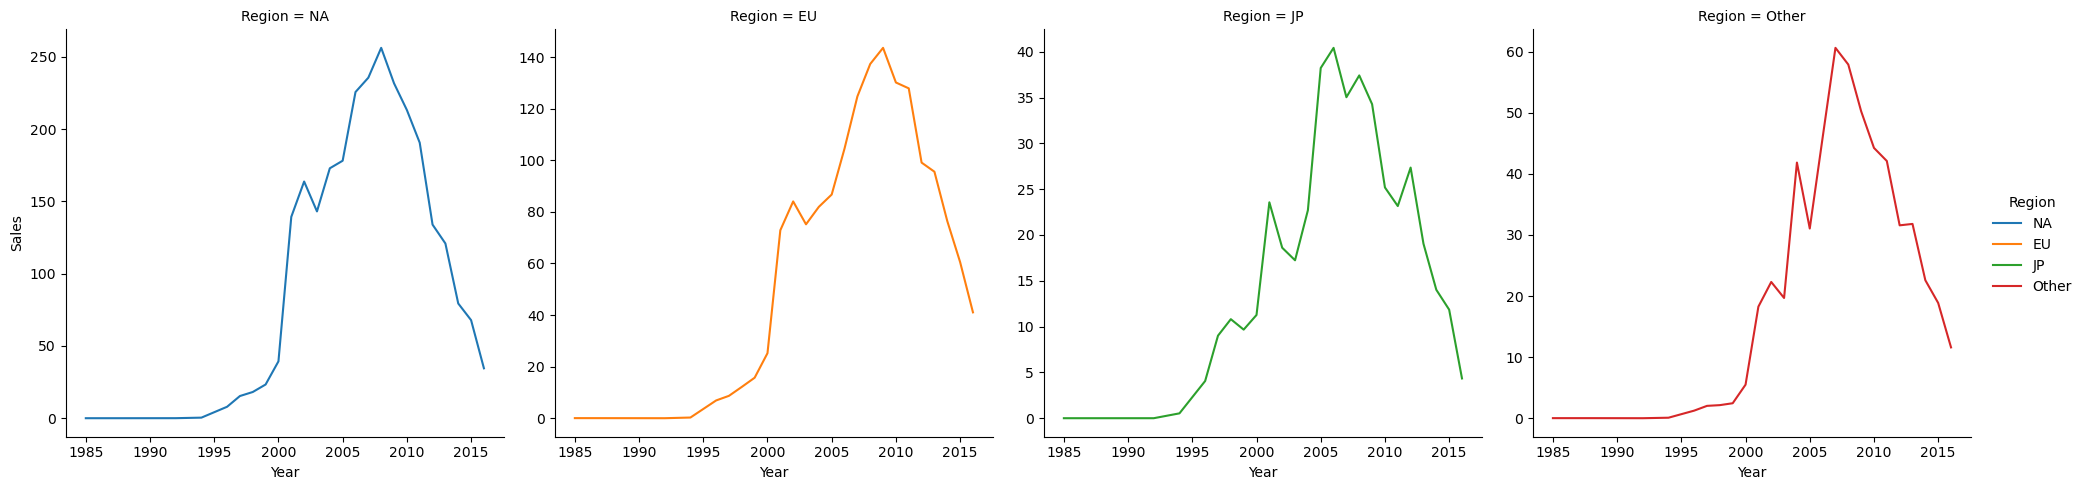

In [131]:
evolved_sales = evolved_sales[np.isfinite(evolved_sales['Year'])]
sns.relplot(x = 'Year', y = 'Sales', data = evolved_sales, hue = 'Region', col = 'Region', kind='line',facet_kws={"sharey": False} )


In [132]:
genre_sales = df.groupby(['Genre','Year'], observed=True)[['Global']].sum().reset_index()


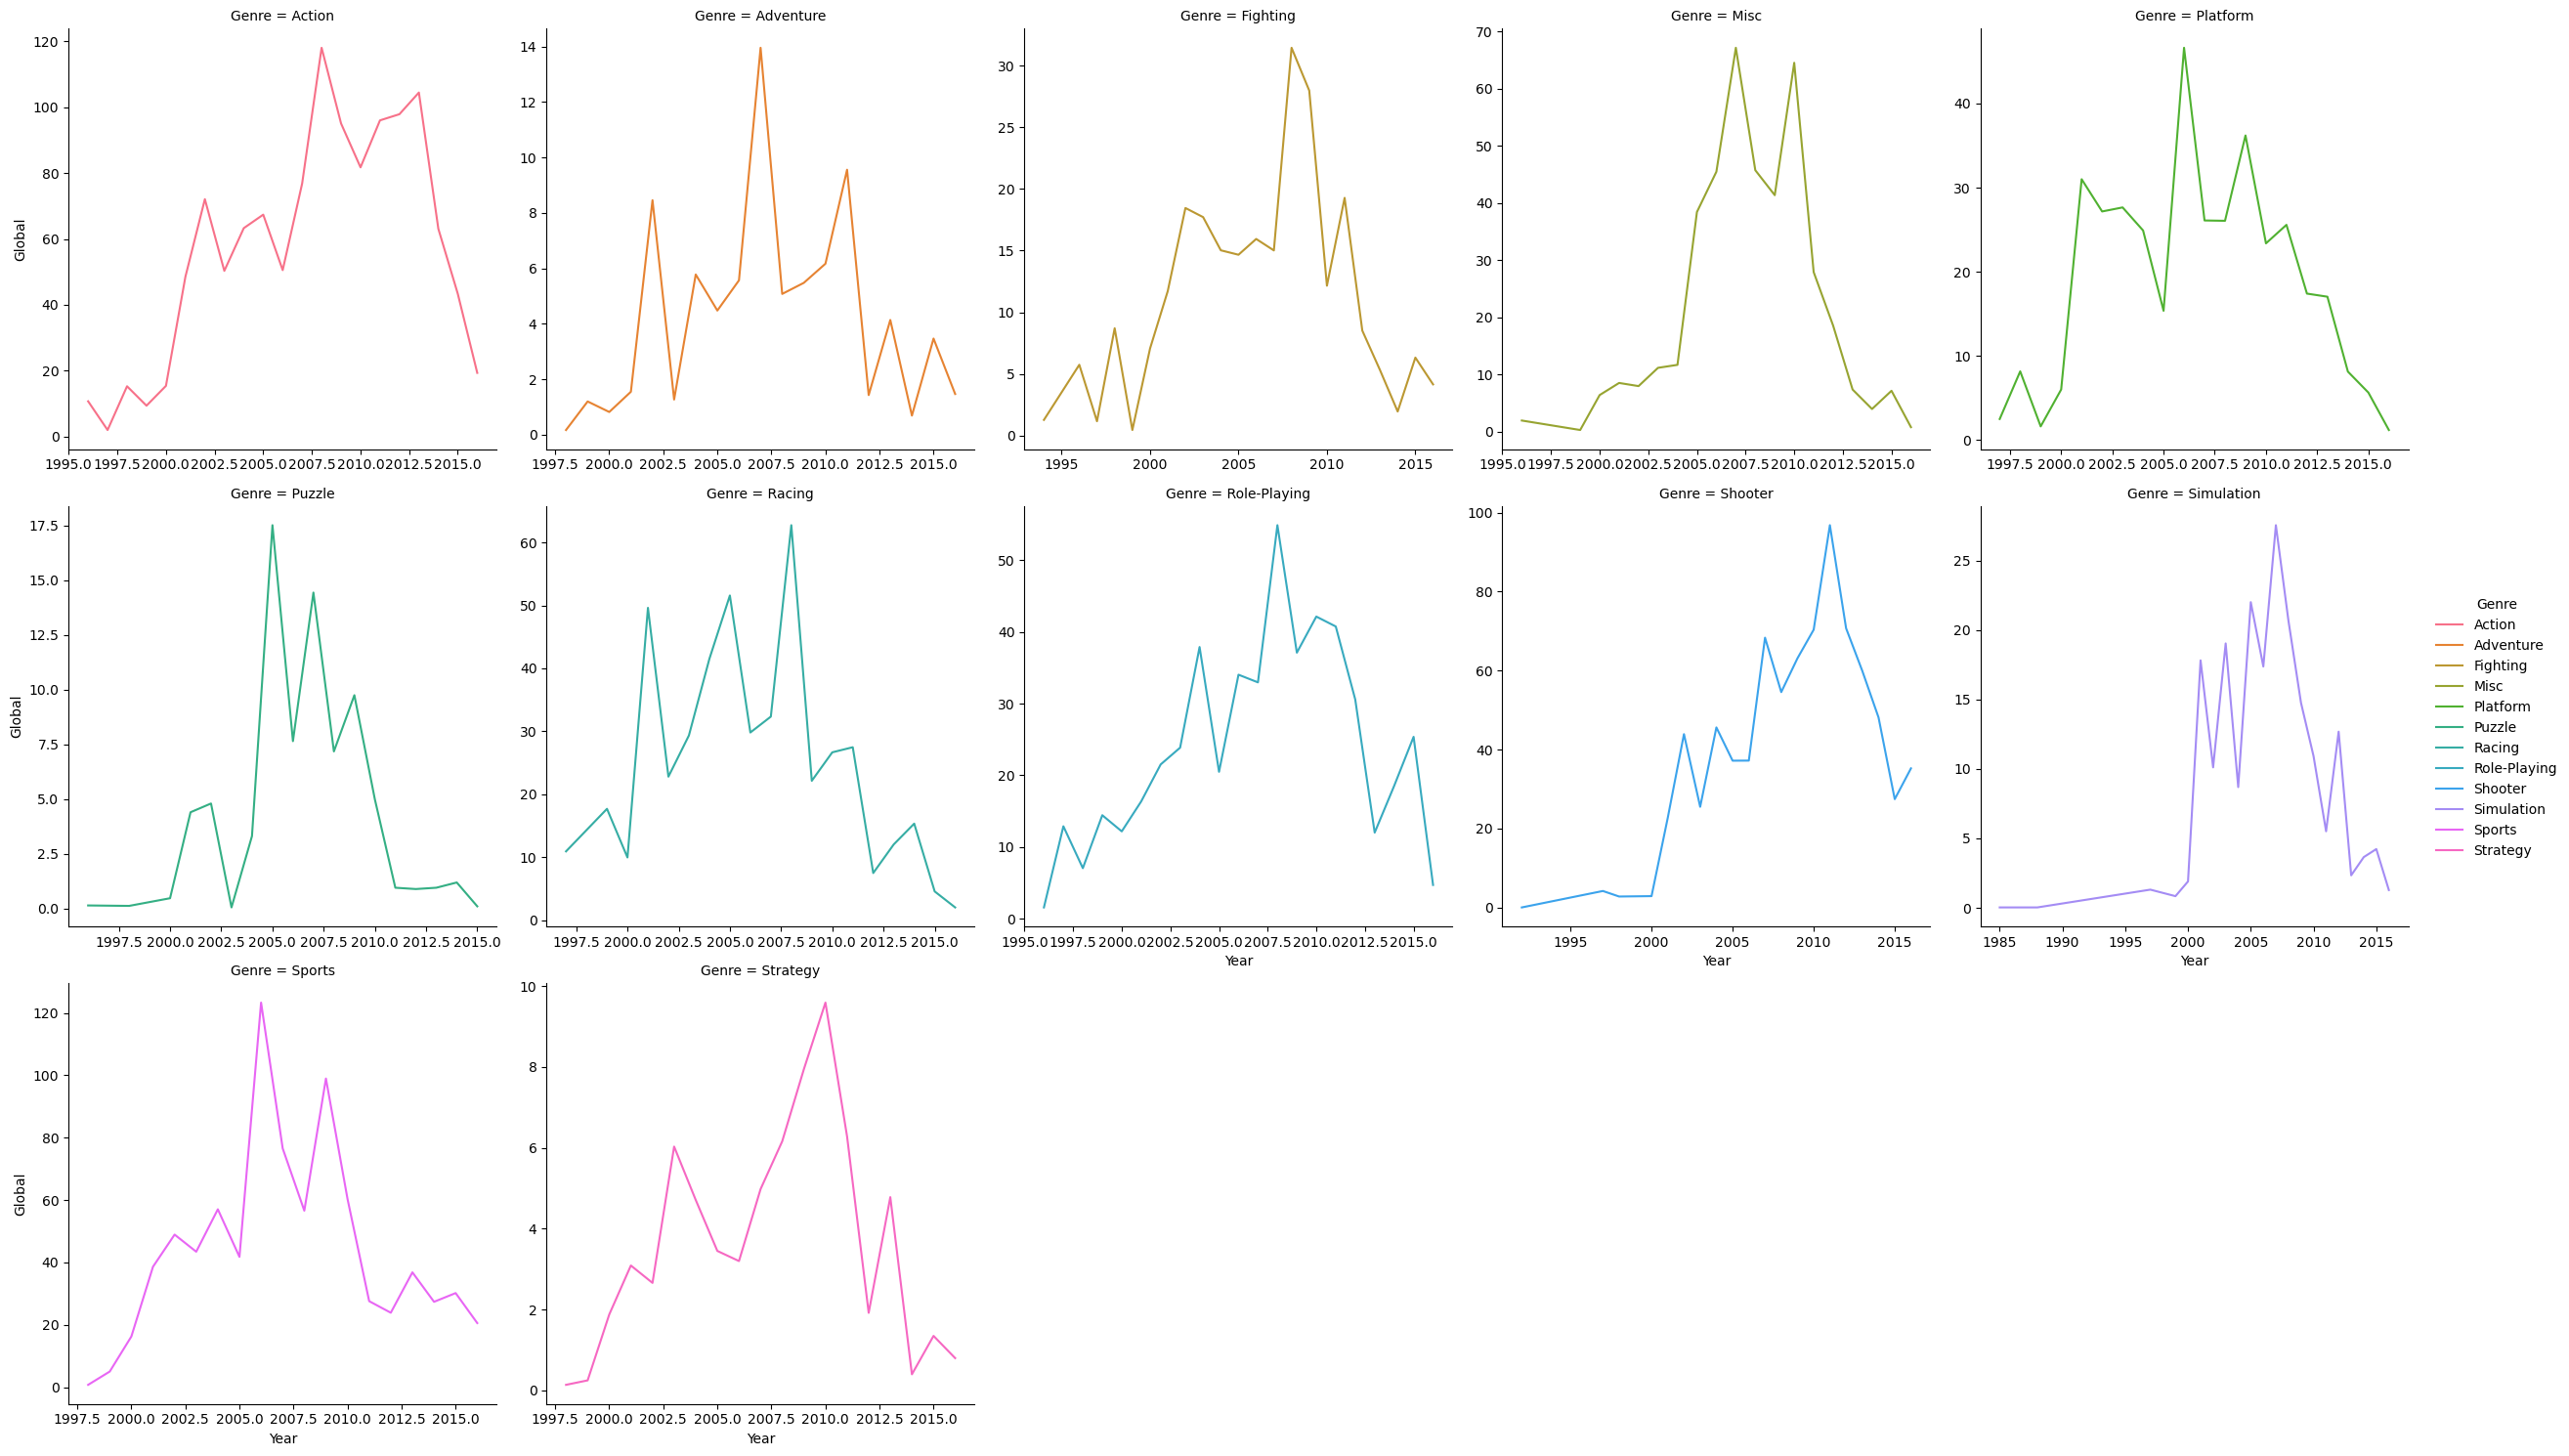

In [133]:
sns.relplot(data=genre_sales,  x="Year", y = 'Global',hue = 'Genre', col = 'Genre',kind = 'line', col_wrap=5,facet_kws={"sharex": False, "sharey": False} )

In [134]:
p_1 = df.groupby(['Platform','Year'], observed=True)[['Global']].sum().reset_index()
p_1['Platform'] = p_1['Platform'].astype(str).str.strip()

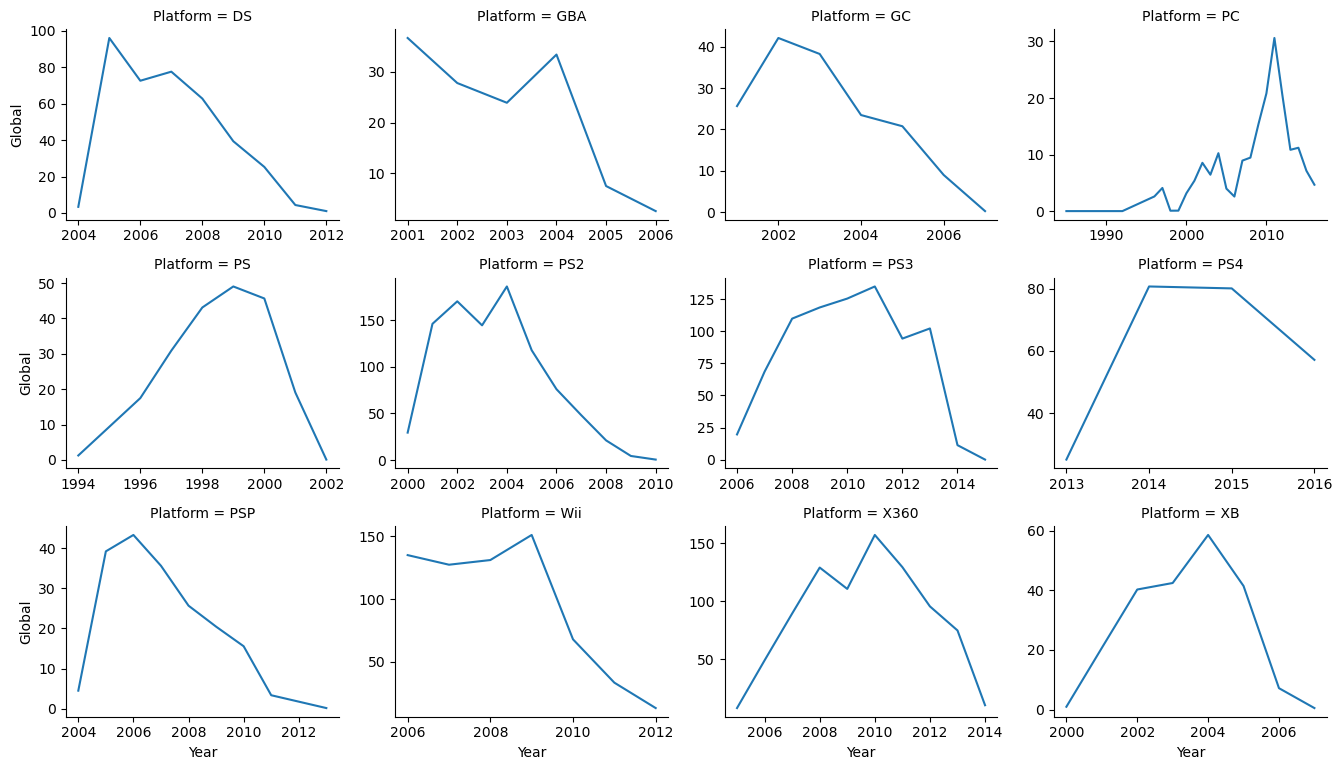

In [135]:
platform_sales = p_1[p_1['Platform'].isin(top_platform)]
sns.relplot(data=platform_sales, x='Year', y='Global', col='Platform', col_wrap=4, kind='line', facet_kws={"sharex": False, "sharey": False}, height=2.6, aspect=1.3)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   object  
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  User_Score    6824 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 647.7+ KB


In [137]:
grouped_preferences= df.groupby(['Year','Genre'], observed = True)[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
melted_preferences = pd.melt(grouped_preferences, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [138]:
genre = df[['Genre', 'Global']]

In [139]:
grouped_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [140]:
top_genre = grouped_genre.groupby('Genre', observed = True)['Global'].sum().sort_values(ascending=False).head(5).index


In [141]:
genre_pref = melted_preferences[melted_preferences['Genre'].isin(top_genre)]

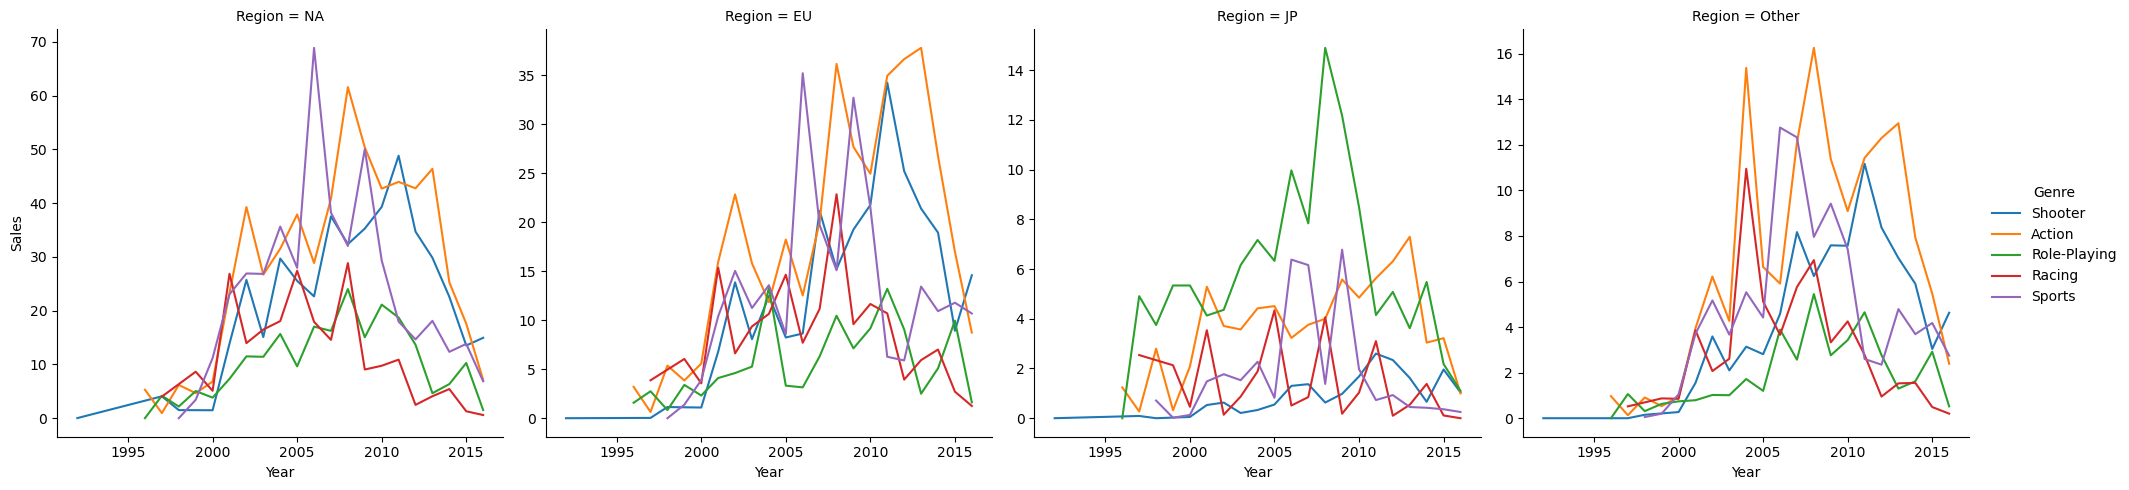

In [142]:
sns.relplot(x = 'Year', y = 'Sales', data = genre_pref, hue = 'Genre', col = 'Region', kind='line', facet_kws={'sharey': False, 'sharex': True})

In [143]:
critic = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [144]:
critic = critic.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [145]:
critic

,Critic_Score,Genre,Region,Sales
0,76.0,Sports,NA,41.36
1,82.0,Racing,NA,15.68
2,80.0,Sports,NA,15.61
3,89.0,Platform,NA,11.28
4,58.0,Misc,NA,13.96
...,...,...,...,...
27291,46.0,Action,Other,0.00
27292,81.0,Fighting,Other,0.00
27293,80.0,Action,Other,0.00
27294,61.0,Shooter,Other,0.00


In [146]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing'], dtype='object', name='Genre')

In [147]:
grouped_genre

,Genre,Global
0,Action,1200.79
1,Adventure,80.75
2,Fighting,249.95
3,Misc,416.26
4,Platform,377.80
5,Puzzle,78.90
6,Racing,476.22
7,Role-Playing,501.37
8,Shooter,816.48
9,Simulation,202.70


In [148]:
critic = critic[critic['Genre'].isin(top_genre)]

In [149]:
critic= critic.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()
critic = critic[critic['Sales'] > 0]
critic

,Region,Genre,Critic_Score,Sales
3,EU,Action,24.0,0.03
4,EU,Action,25.0,0.02
5,EU,Action,26.0,0.13
6,EU,Action,27.0,0.04
8,EU,Action,29.0,0.02
...,...,...,...,...
1375,Other,Sports,93.0,1.52
1376,Other,Sports,94.0,1.06
1377,Other,Sports,95.0,0.58
1378,Other,Sports,97.0,0.48


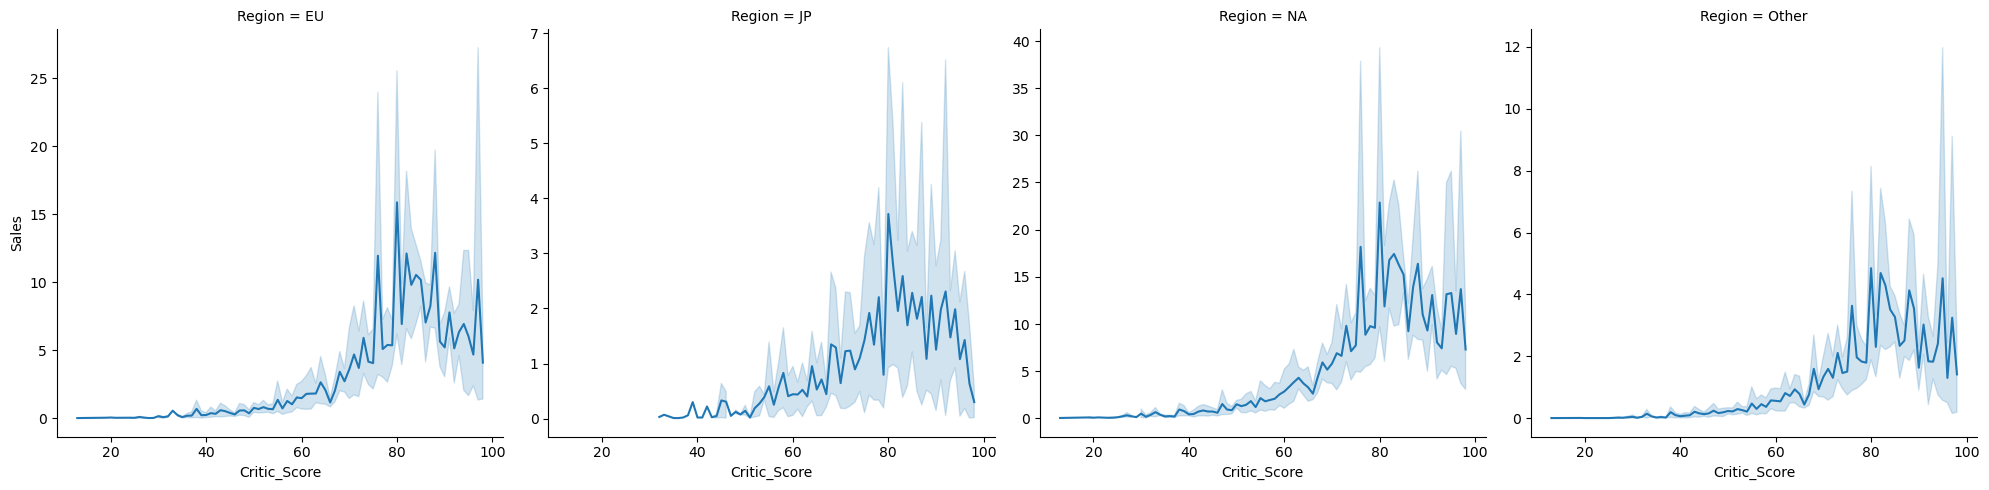

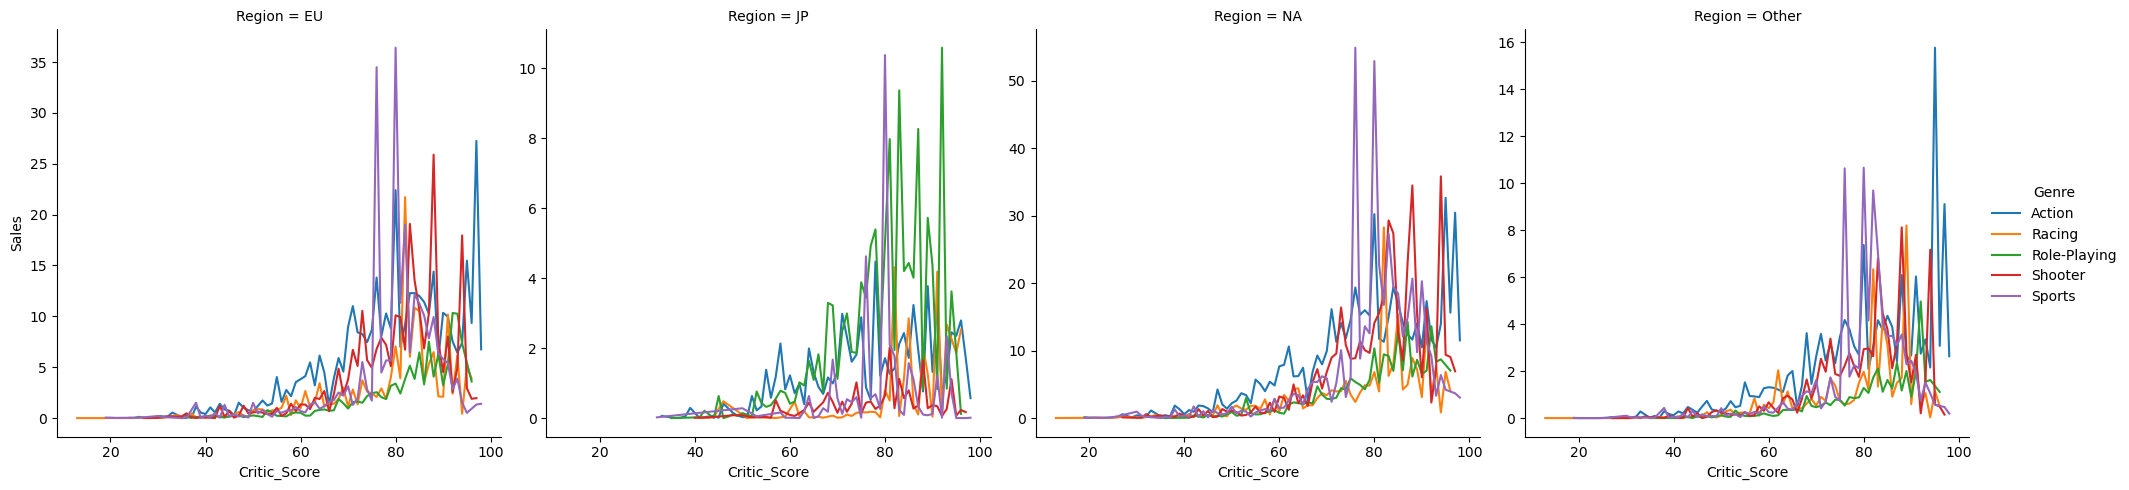

In [150]:
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales', hue = 'Genre',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})


In [151]:
user = df[['User_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [152]:
user = user.melt( id_vars = ['User_Score','Genre'],var_name = 'Region', value_name = 'Sales')
user

,User_Score,Genre,Region,Sales
0,8.0,Sports,NA,41.36
1,8.3,Racing,NA,15.68
2,8.0,Sports,NA,15.61
3,8.5,Platform,NA,11.28
4,6.6,Misc,NA,13.96
...,...,...,...,...
27291,2.4,Action,Other,0.00
27292,8.8,Fighting,Other,0.00
27293,7.6,Action,Other,0.00
27294,5.8,Shooter,Other,0.00


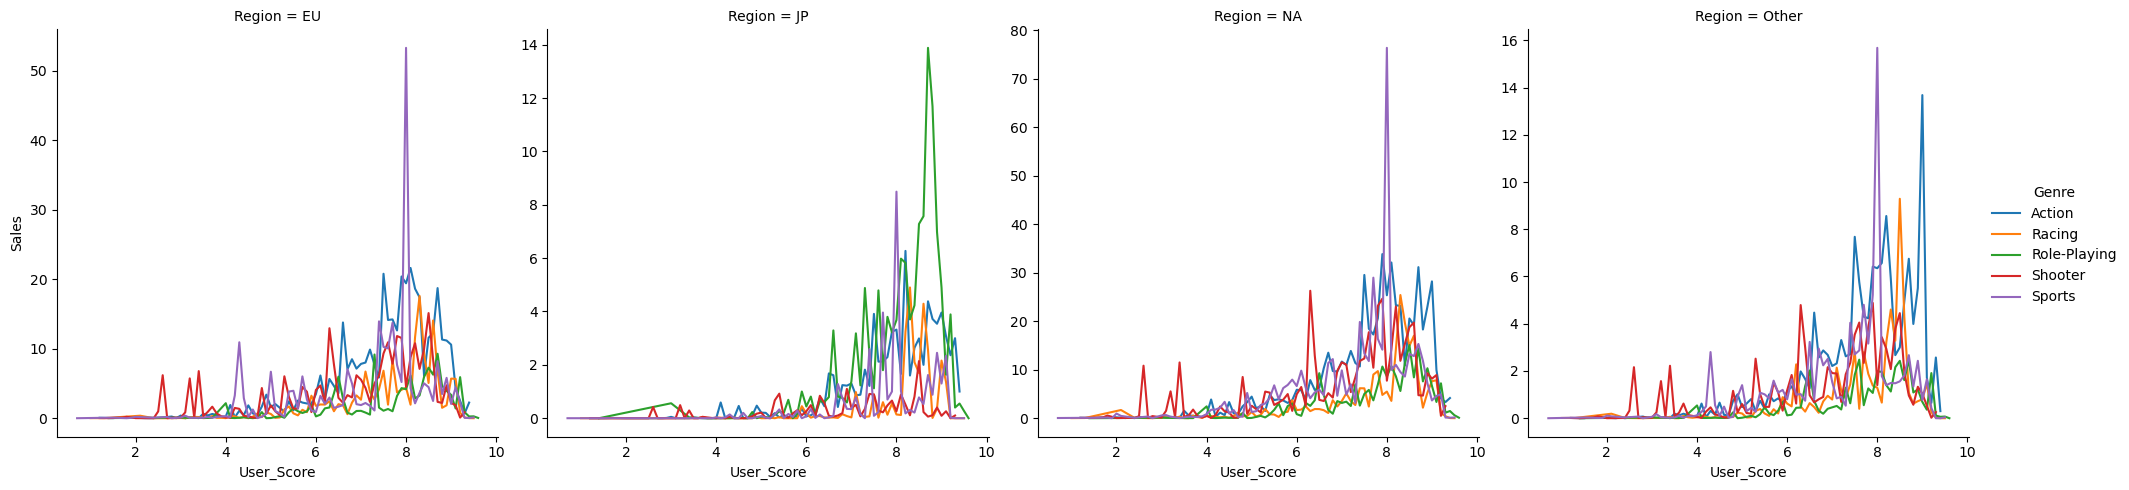

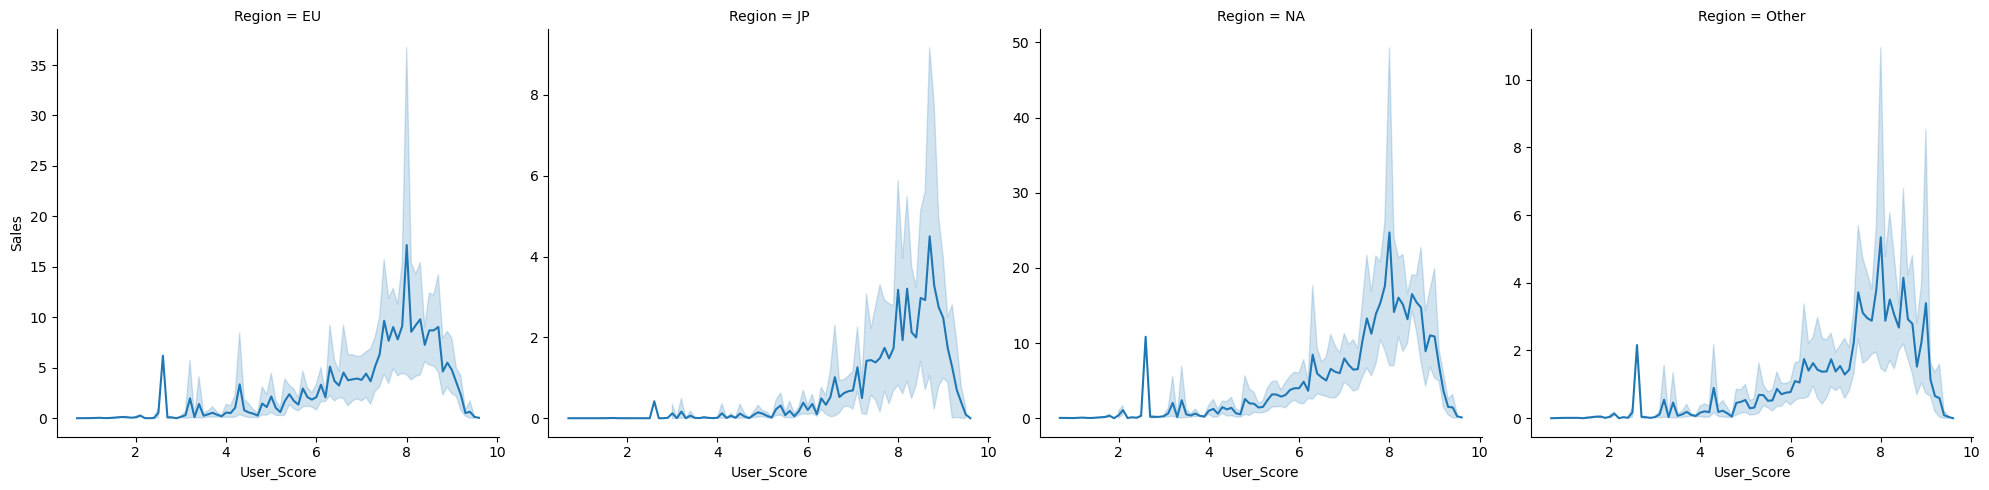

In [153]:
user = user[user['Genre'].isin(top_genre)]
critic = critic[critic['Sales'] > 0]
user_score = user.groupby(['Region','Genre','User_Score'])[['Sales']].sum().reset_index()
user_score_1 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
user_score_2 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

In [175]:
critic_sales = df[['Year', 'Global', 'Name', 'Critic_Score']]

In [180]:
critic_sales_max = critic_sales[
    critic_sales.groupby('Year')['Global'].transform('max') == critic_sales['Global']
]
critic_sales_max = critic_sales_max[critic_sales_max['Name'].isin(top_games)]
print(critic_sales_max)

    Year  Global                           Name  Critic_Score
0   2006   82.53                     Wii Sports          76.0
2   2008   35.52                 Mario Kart Wii          82.0
3   2009   32.77              Wii Sports Resort          80.0
11  2005   23.21                  Mario Kart DS          91.0
13  2007   22.70                        Wii Fit          80.0
14  2010   21.81             Kinect Adventures!          61.0
16  2013   21.04             Grand Theft Auto V          97.0
17  2004   20.81  Grand Theft Auto: San Andreas          95.0
24  2002   16.15    Grand Theft Auto: Vice City          95.0
28  2001   14.98         Gran Turismo 3: A-Spec          95.0
42  2014   12.61             Grand Theft Auto V          97.0


In [181]:
user_sales = df[['Year', 'Global', 'Name', 'User_Score']]

In [182]:
user_sales_max = user_sales[
    user_sales.groupby('Year')['Global'].transform('max') == user_sales['Global']
]

user_sales_max = user_sales_max[user_sales_max['User_Score'].notna()]

In [183]:
top_games = user_sales_max[['Name', 'Global']].sort_values(by = 'Global', ascending = False).head(10)
top_games = top_games['Name'].tolist()

In [184]:
user_sales_max = user_sales_max[user_sales_max['Name'].isin(top_games)]

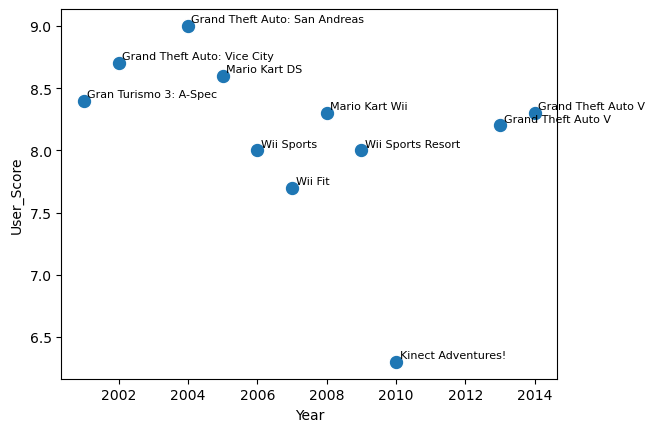

In [185]:
plot_df = user_sales_max.sort_values('Year')
ax = sns.scatterplot(data=plot_df, x='Year', y='User_Score', s=110, color='tab:blue')
for _, r in plot_df.iterrows():
    ax.text(r['Year']+0.1, r['User_Score']+0.03, r['Name'], fontsize=8)

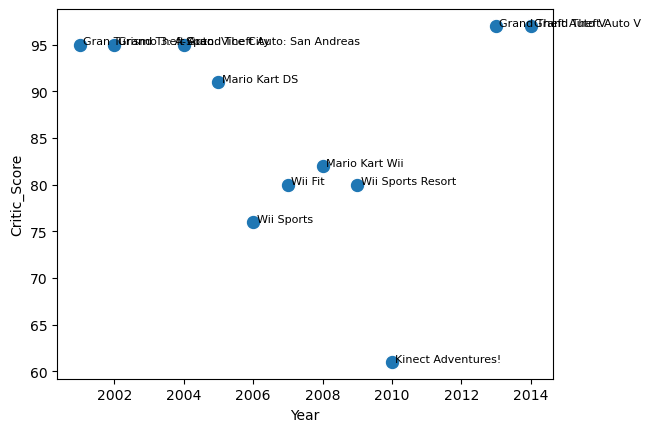

In [186]:
plot_df_1 = critic_sales_max.sort_values('Year')
ax = sns.scatterplot(data=plot_df_1, x='Year', y='Critic_Score', s=110, color='tab:blue')
for _, r in plot_df_1.iterrows():
    ax.text(r['Year']+0.1, r['Critic_Score']+0.03, r['Name'], fontsize=8)

In [187]:
plot_df_1

,Year,Global,Name,Critic_Score
28,2001,14.98,Gran Turismo 3: A-Spec,95.0
24,2002,16.15,Grand Theft Auto: Vice City,95.0
17,2004,20.81,Grand Theft Auto: San Andreas,95.0
11,2005,23.21,Mario Kart DS,91.0
0,2006,82.53,Wii Sports,76.0
13,2007,22.70,Wii Fit,80.0
2,2008,35.52,Mario Kart Wii,82.0
3,2009,32.77,Wii Sports Resort,80.0
14,2010,21.81,Kinect Adventures!,61.0
16,2013,21.04,Grand Theft Auto V,97.0
